In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import missingno as msno
df=pd.read_csv("C:\\Users\\GPT BANTWAL\\stock price-tesla.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [5]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2411,False,False,False,False,False,False,False
2412,False,False,False,False,False,False,False
2413,False,False,False,False,False,False,False
2414,False,False,False,False,False,False,False


In [6]:
df.shape

(2416, 7)

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [11]:
print('length of dataset:',len(df))

length of dataset: 2416


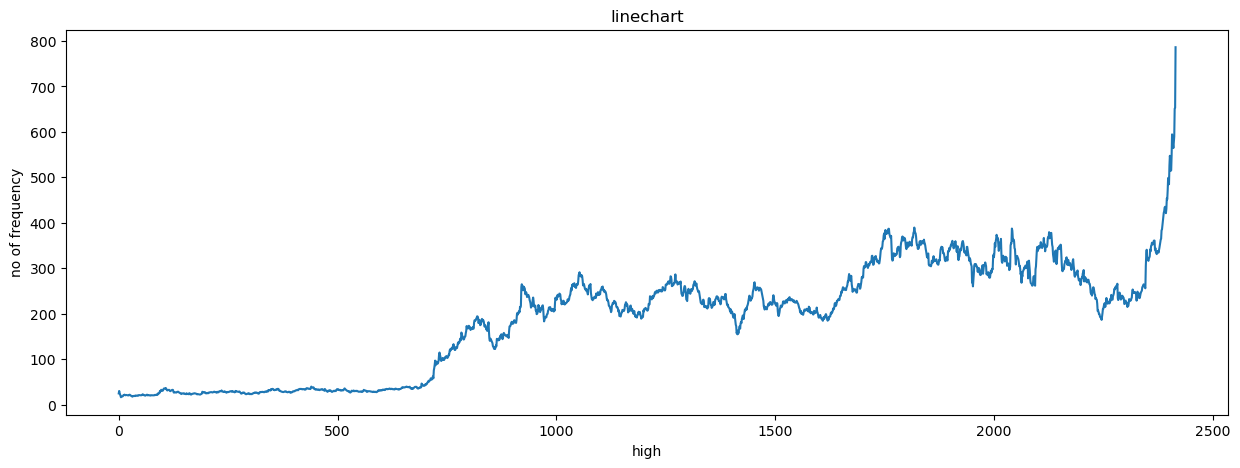

In [12]:
import matplotlib.pyplot as plt
df['High'].plot(figsize=(15,5))
plt.title("linechart")
plt.xlabel("high")
plt.ylabel("no of frequency")
plt.show()

In [13]:
x=df
x['year']=pd.DatetimeIndex(x['Date']).year
x['month']=pd.DatetimeIndex(x['Date']).month
x['day']=pd.DatetimeIndex(x['Date']).day
x

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,29
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,30
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,1
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,2
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,6
...,...,...,...,...,...,...,...,...,...,...
2411,1/28/2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1,28
2412,1/29/2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1,29
2413,1/30/2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1,30
2414,1/31/2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1,31


In [14]:
x=df.drop(['Close','Date'],axis=1)
x

,Open,High,Low,Adj Close,Volume,year,month,day
0,19.000000,25.000000,17.540001,23.889999,18766300,2010,6,29
1,25.790001,30.420000,23.299999,23.830000,17187100,2010,6,30
2,25.000000,25.920000,20.270000,21.959999,8218800,2010,7,1
3,23.000000,23.100000,18.709999,19.200001,5139800,2010,7,2
4,20.000000,20.000000,15.830000,16.110001,6866900,2010,7,6
...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,2020,1,28
2412,575.690002,589.799988,567.429993,580.989990,17801500,2020,1,29
2413,632.419983,650.880005,618.000000,640.809998,29005700,2020,1,30
2414,640.000000,653.000000,632.520020,650.570007,15719300,2020,1,31


In [15]:
y=df['Close']
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1691, 8)
(725, 8)
(1691,)
(725,)


In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[-3.23842463e-14  3.02410888e-14  2.85742486e-15  1.00000000e+00
  4.74338450e-20  6.49890395e-16 -2.10521652e-16 -5.41403777e-17]


In [19]:
print(regressor.intercept_)

-1.6200374375330284e-12


In [20]:
predicted=regressor.predict(x_test)
predicted

array([ 17.6     ,  20.43    , 226.699997, 255.009995, 310.350006,
       206.429993, 217.360001,  34.610001, 314.920013, 225.610001,
       197.779999, 235.580002, 307.880005, 320.100006,  32.189999,
       259.570007, 229.699997, 572.200012, 210.190002, 347.320007,
       206.550003, 253.5     ,  27.120001, 244.789993,  22.959999,
        37.509998, 219.990005, 219.619995, 310.420013, 335.48999 ,
       352.929993, 249.059998,  39.169998, 300.98999 , 343.850006,
        28.77    ,  29.43    , 260.420013, 348.160004,  27.58    ,
       223.570007, 199.369995, 393.149994, 225.789993,  32.07    ,
       262.799988, 204.639999, 316.130005, 383.450012, 345.890015,
       210.949997,  28.08    , 362.369995, 300.929993,  30.99    ,
       325.220001, 296.839996, 323.660004, 236.800003,  35.290001,
       331.290009, 218.550003, 204.460007,  29.25    , 252.940002,
       279.720001, 347.48999 , 120.5     , 254.779999,  24.030001,
        34.43    ,  36.990002,  21.4     , 206.789993, 255.339

In [21]:
print(x_test)

            Open        High         Low   Adj Close   Volume  year  month  \
31     17.799999   17.900000   17.389999   17.600000   691000  2010      8   
71     20.430000   20.790001   20.389999   20.430000   267800  2010     10   
1016  219.990005  228.789993  215.449997  226.699997  7203200  2014      7   
1694  251.559998  255.070007  250.509995  255.009995  4059300  2017      3   
1736  312.799988  314.369995  306.799988  310.350006  4329200  2017      5   
...          ...         ...         ...         ...      ...   ...    ...   
1882  344.899994  346.730011  337.579987  338.869995  5476200  2017     12   
1188  202.000000  204.589996  194.529999  195.649994  8475200  2015      3   
2276  249.300003  253.529999  247.929993  252.380005  8149000  2019      7   
310    25.980000   26.600000   25.670000   26.010000  1180400  2011      9   
1567  207.000000  209.429993  205.000000  206.339996  2299500  2016      9   

      day  
31     12  
71      8  
1016   14  
1694   22  
173

In [22]:
predicted.shape

(725,)

In [23]:
dframe=pd.DataFrame(y_test,predicted)
dframe

,Close
17.600000,NaN
20.430000,NaN
226.699997,NaN
255.009995,NaN
310.350006,NaN
...,...
338.869995,NaN
195.649994,NaN
252.380005,NaN
26.010000,NaN


In [24]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted price':predicted})
dfr

,Actual Price,Predicted price
31,17.600000,17.600000
71,20.430000,20.430000
1016,226.699997,226.699997
1694,255.009995,255.009995
1736,310.350006,310.350006
...,...,...
1882,338.869995,338.869995
1188,195.649994,195.649994
2276,252.380005,252.380005
310,26.010000,26.010000


In [25]:
df.head(60)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,29
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,30
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,1
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,2
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,6
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,2010,7,7
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,2010,7,8
7,7/9/2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,2010,7,9
8,7/12/2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,2010,7,12
9,7/13/2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,2010,7,13


In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
l_test_accuracy=regressor.score(x_test,y_test)
print('train_accuracy:',l_test_accuracy)

train_accuracy: 1.0
train_accuracy: 1.0


In [27]:
import math
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 2.119034449825794e-13
Mean Squared Error: 7.488328189509692e-26
Root Mean Absolute Error: 2.7364809865061534e-13


In [28]:
graph=dfr.head(30)
graph

,Actual Price,Predicted price
31,17.600000,17.600000
71,20.430000,20.430000
1016,226.699997,226.699997
1694,255.009995,255.009995
1736,310.350006,310.350006
1570,206.429993,206.429993
1160,217.360001,217.360001
624,34.610001,34.610001
2352,314.920013,314.920013
2309,225.610001,225.610001


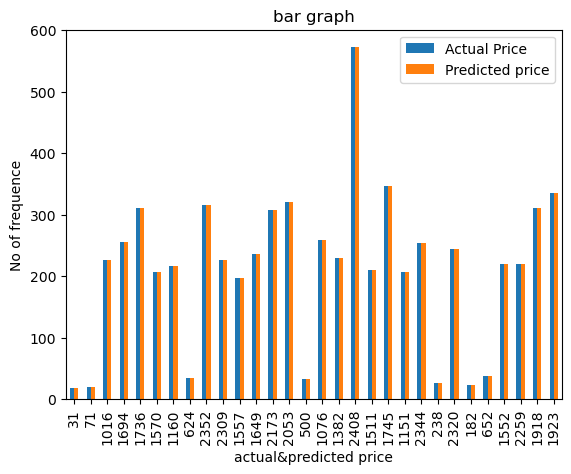

In [29]:
graph.plot(kind='bar')
plt.title('bar graph')
plt.xlabel('actual&predicted price')
plt.ylabel('No of frequence')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [31]:
predicted=regressor.predict(x_test)
predicted

array([ 17.62529956,  20.44870005, 226.85389998, 254.97950208,
       310.36339719, 206.35250059, 217.0308038 ,  34.62650044,
       314.97610139, 225.67869744, 197.69499943, 235.49219936,
       307.725402  , 319.87649247,  32.19320099, 259.76900056,
       229.72449752, 565.68560838, 210.12130128, 347.26780337,
       206.63379849, 253.61509761,  27.11220017, 244.75020031,
        22.9463996 ,  37.43940044, 219.99720043, 219.58849937,
       310.41299401, 335.27210556, 352.69830269, 249.01460065,
        39.09839911, 301.02439884, 343.94140548,  28.74529993,
        29.424     , 260.39650184, 348.13500978,  27.5713002 ,
       223.54279804, 199.37330238, 383.97499499, 225.79689808,
        32.12110092, 262.70519934, 204.67610086, 316.13970095,
       381.2099897 , 346.1071948 , 210.91989743,  28.07529973,
       362.44279446, 301.06839824,  31.00639972, 325.10370627,
       297.32949672, 323.32880247, 236.87960101,  35.32859998,
       331.03349986, 218.52029821, 204.54160077,  29.25

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
R_test_accuracy=regressor.score(x_test,y_test)
print('test_accuracy:',R_test_accuracy)

train_accuracy: 0.9998541636691559
test_accuracy: 0.9999665732134986


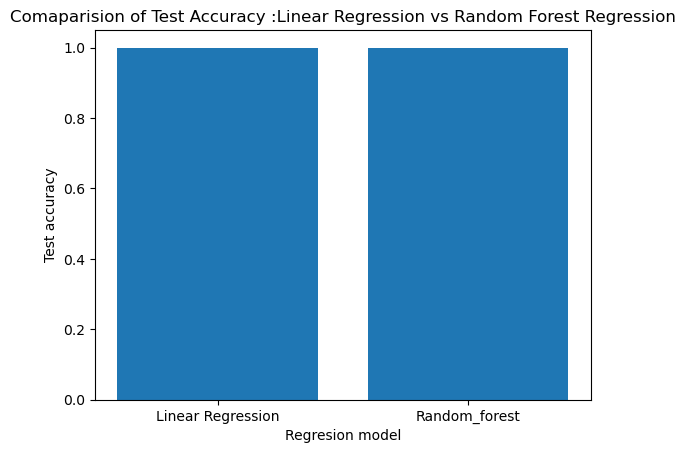

In [33]:
import matplotlib.pyplot as plt
linear_regression_accuracy=1.0
random_forest_accuracy=0.9998541636691559
accuracy_scores=[linear_regression_accuracy,random_forest_accuracy]
model_names=['Linear Regression','Random_forest']
plt.bar(model_names,accuracy_scores)
plt.xlabel('Regresion model')
plt.ylabel('Test accuracy')
plt.title('Comaparision of Test Accuracy :Linear Regression vs Random Forest Regression')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
from sklearn.neural_network import MLPRegressor
ann_model=MLPRegressor(hidden_layer_sizes=(128,64,32),activation='relu',solver='lbfgs')
ann_model.fit(x_train,y_train)

C:\Users\GPT BANTWAL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(128, 64, 32), solver='lbfgs')

In [37]:
y_pred=ann_model.predict(x_test)
y_pred

array([ 18.10566554,  20.733184  , 226.53369748, 254.80027076,
       310.13178093, 205.91597836, 217.50262144,  34.84920106,
       315.45732428, 225.97033246, 198.27386563, 235.85884533,
       307.56869011, 320.89595816,  32.31807427, 259.58090174,
       229.53945466, 572.44787446, 210.06979718, 346.75265861,
       206.83064921, 253.16450901,  27.17869008, 244.46381683,
        23.09947341,  38.23917145, 219.74099845, 220.09941524,
       308.81189936, 336.10728257, 353.28138328, 249.6323137 ,
        38.90417422, 300.95730194, 344.01612877,  28.52557385,
        29.62683093, 260.41972037, 348.12674666,  27.48860905,
       223.71377475, 199.65084045, 393.71883776, 226.10328916,
        31.80658948, 263.26158288, 204.44212896, 314.75738426,
       383.75425346, 345.55990121, 211.34113488,  28.11599955,
       362.71021825, 301.76914983,  31.04384851, 324.80600979,
       297.05131082, 323.13406623, 236.78146606,  35.36143239,
       331.46019589, 218.83918241, 204.67102659,  29.43

In [38]:
train_accuracy=ann_model.score(x_train,y_train)
print('train_accuracy(R_Squared):',train_accuracy)
R_test_accuracy=ann_model.score(x_test,y_test)
print('test_accuracy(R_Squared):',R_test_accuracy)

train_accuracy(R_Squared): 0.9999917224964716
test_accuracy(R_Squared): 0.9999894533451925


In [39]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.1976121028827577
Mean Squared Error: 0.4616881184482488
Root Mean Absolute Error: 0.6794763560627027


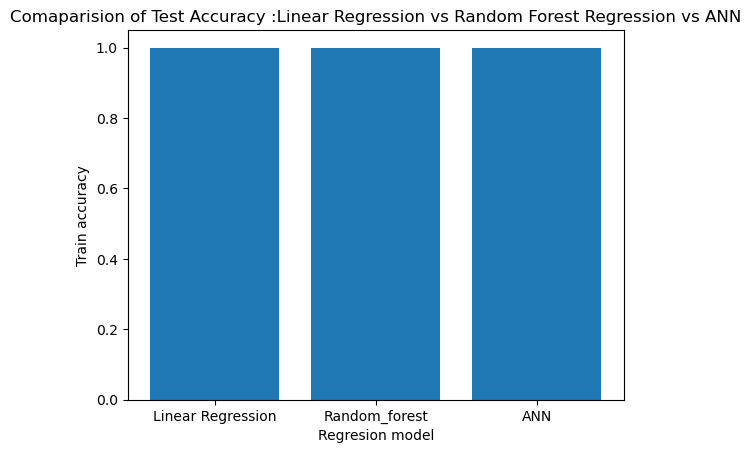

In [42]:
import matplotlib.pyplot as plt
linear_regression_accuracy=1.0
random_forest_accuracy= 0.9998541636691559
ANN=0.9999917224964716
accuracy_scores=[linear_regression_accuracy,random_forest_accuracy,ANN]
model_names=['Linear Regression','Random_forest','ANN']
plt.bar(model_names,accuracy_scores)
plt.xlabel('Regresion model')
plt.ylabel('Train accuracy')
plt.title('Comaparision of Test Accuracy :Linear Regression vs Random Forest Regression vs ANN')
plt.show()